# Linear Support Vector Machine: Soft Margin
----------------------------------

This function shows how to use TensorFlow to create a soft margin SVM

We will use the iris data, specifically:

$x_1 =$ Sepal Length

$x_2 =$ Petal Width

Class 1 : `I. setosa`

Class -1: `not I. setosa`

We know here that x and y are linearly seperable for I. setosa classification.


>Note that we implement the soft margin with an allowable margin of error for points.  The margin of error term is given by 'alpha' below.  To behave like a hard margin SVM, set alpha = 0. (in notebook code block #7)

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Set a random seed and start a computational graph.

In [157]:
np.random.seed(41)
tf.set_random_seed(41)
sess = tf.Session()

Load the data

In [158]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

Split data into train/test sets

In [159]:
train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8),
                                 replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

Set model parameters, placeholders, and coefficients.

In [160]:
# Declare batch size
batch_size = 110

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for SVM
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

Declare our model and L2 Norm

SVM linear model is given by the equation:

$$\left[ \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i(A \cdot x - b)) \right] + \alpha \cdot ||A||^{2}$$

Our loss function will be the above quantity and we will tell TensorFlow to minimize it. Note that $n$ is the number of points (in a batch), $A$ is the hyperplane-normal vector (to solve for), $b$ is the hyperplane-offset (to solve for), and $\alpha$ is the soft-margin parameter.

In [161]:
# Declare model operations
model_output = tf.subtract(tf.matmul(x_data, A), b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A))

Here we make our special loss function based on the classification of the points (which side of the line they fall on).

Also, note that `alpha` is the soft-margin term and an be increased to allow for more erroroneous classification points.  For hard-margin behaviour, set `alpha = 0`.

In [162]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

alpha = tf.constant([0.01])

# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

Creat the prediction function, optimization algorithm, and initialize the variables.

In [163]:
# Declare prediction function
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.005)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we can start the training loop.

In [164]:
# Training loop
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_train,
        y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)

    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)

    if (i + 1) % 75 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = ' + str(temp_loss))

Step #75 A = [[0.6558717 ]
 [0.73911524]], b = [[0.8189382]]
Loss = [3.477592]
Step #150 A = [[0.30820855]
 [0.37043768]], b = [[1.1588708]]
Loss = [1.8782014]
Step #225 A = [[0.05466478]
 [0.01620324]], b = [[1.3756151]]
Loss = [0.61904144]
Step #300 A = [[ 0.0723088 ]
 [-0.10384972]], b = [[1.2969997]]
Loss = [0.50430346]
Step #375 A = [[ 0.08872687]
 [-0.21590038]], b = [[1.214785]]
Loss = [0.5580999]
Step #450 A = [[ 0.10302141]
 [-0.33577552]], b = [[1.1402861]]
Loss = [0.6007062]
Step #525 A = [[ 0.12028285]
 [-0.46366042]], b = [[1.0620526]]
Loss = [0.47809905]
Step #600 A = [[ 0.14511389]
 [-0.59947836]], b = [[0.97037107]]
Loss = [0.5683762]
Step #675 A = [[ 0.16354077]
 [-0.7458742 ]], b = [[0.8814289]]
Loss = [0.54525423]
Step #750 A = [[ 0.17879456]
 [-0.9077223 ]], b = [[0.7907686]]
Loss = [0.47175968]
Step #825 A = [[ 0.20936711]
 [-1.0691159 ]], b = [[0.6802386]]
Loss = [0.41458398]
Step #900 A = [[ 0.23610586]
 [-1.2391784 ]], b = [[0.5687397]]
Loss = [0.29367685]
Step 

Now we extract the linear coefficients and get the SVM boundary line.

In [165]:
# Extract coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

# Extract x1 and x2 vals
x1_vals = [d[1] for d in x_vals]

# Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

# Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

Matplotlib code for plotting

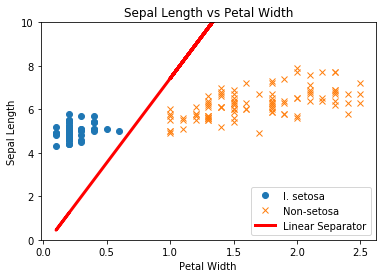

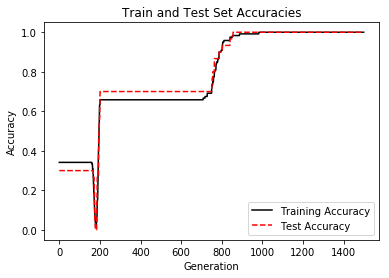

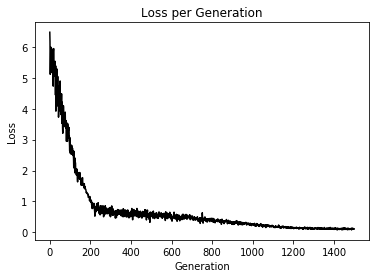

In [166]:
%matplotlib inline
# Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()